In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Столбец "Id" не содержит информацию, это просто порядковый номер набора признаков. Удаляем его

In [3]:
data.drop('Id', axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Изучаем общую информацию о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Пропущенных значений нет, дополнительно в этом убедимся:

In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Описательная статистика нашего датасета:

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Как мы видим датасет сбалансированн по классам, не имеет пропусков

## Визуализация

c:\users\user\ml_practice\ml_prac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

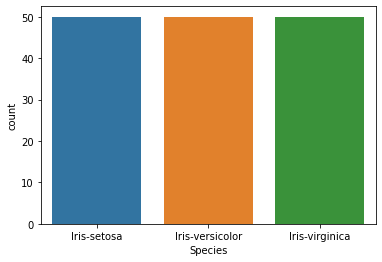

In [8]:
sns.countplot(data.Species, label='Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SepalLengthCm'),
  Text(1, 0, 'SepalWidthCm'),
  Text(2, 0, 'PetalLengthCm'),
  Text(3, 0, 'PetalWidthCm')])

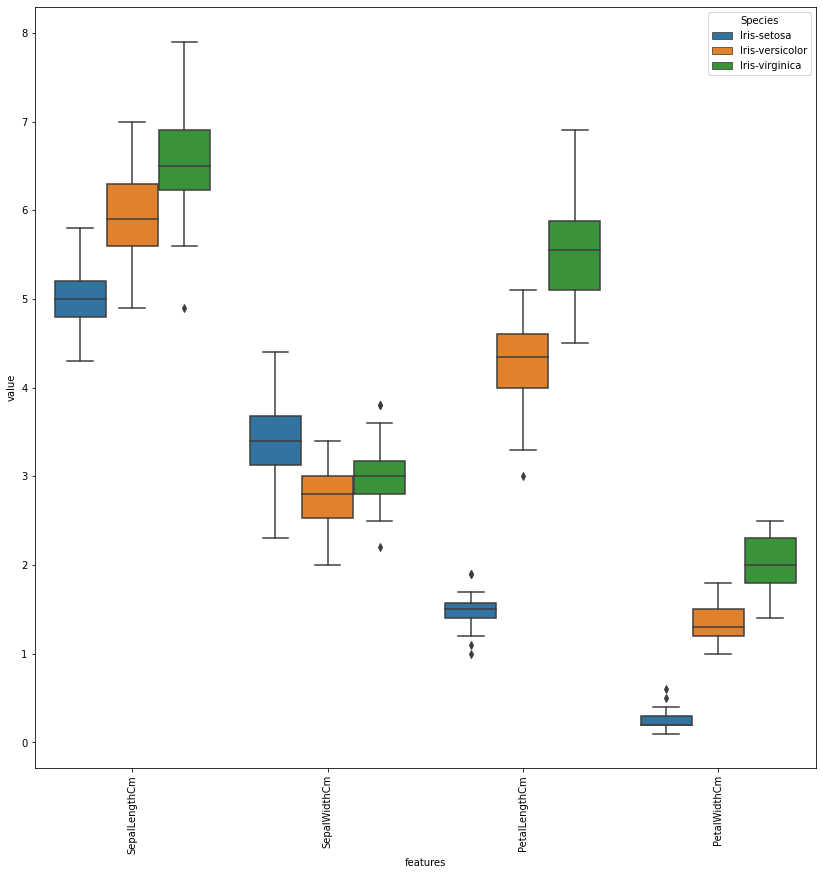

In [9]:
# train_std = (train_dig - train_dig.mean()) / train_dig.std() 
# train_std = pd.concat([y_train, train_std], axis=1)
vis_data = pd.melt(data, id_vars="Species",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,14))
sns.boxplot(x='features', y='value', hue="Species", data=vis_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SepalLengthCm'),
  Text(1, 0, 'SepalWidthCm'),
  Text(2, 0, 'PetalLengthCm'),
  Text(3, 0, 'PetalWidthCm')])

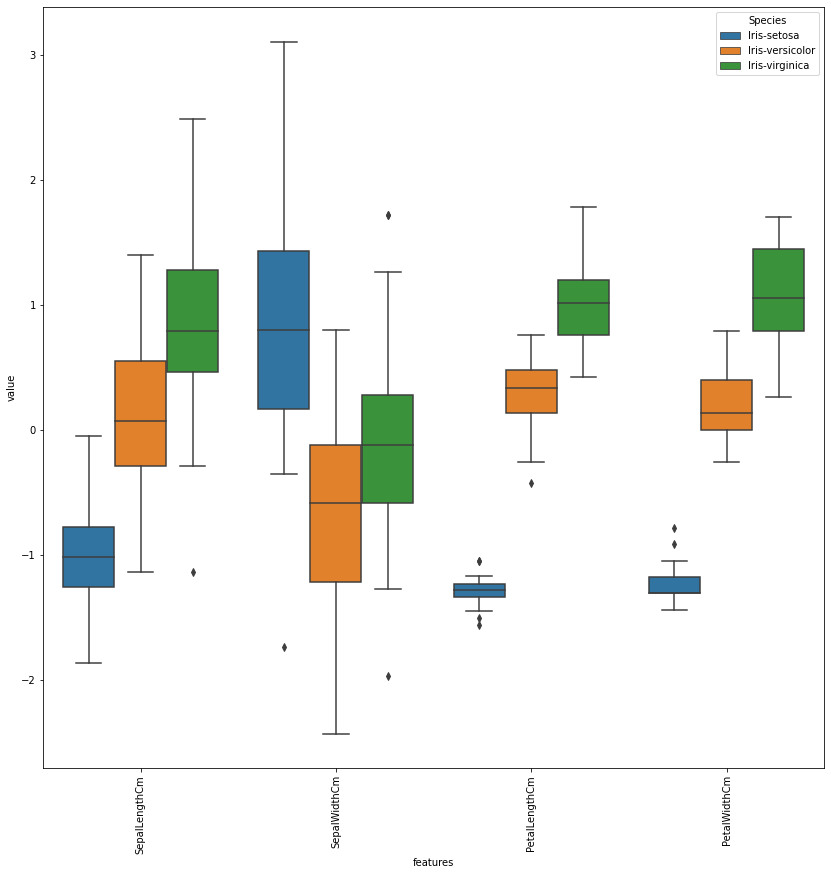

In [10]:
y = data.Species
vis_data = data.drop('Species', axis=1)
vis_data = (vis_data - vis_data.mean()) / vis_data.std() 
vis_data = pd.concat([y, vis_data], axis=1)
vis_data = pd.melt(vis_data, id_vars="Species",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,14))
sns.boxplot(x='features', y='value', hue="Species", data=vis_data)
plt.xticks(rotation=90)

Исходя из анализа графиков можно предположить что класс setosa будет определить легче всего.

<AxesSubplot:>

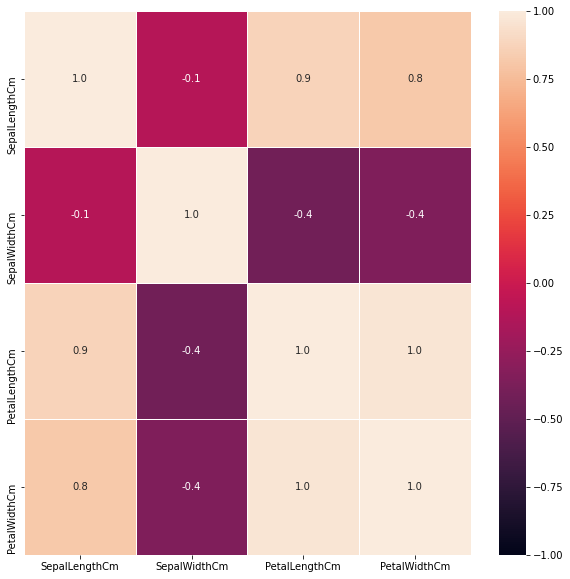

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt= '.1f')

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='P

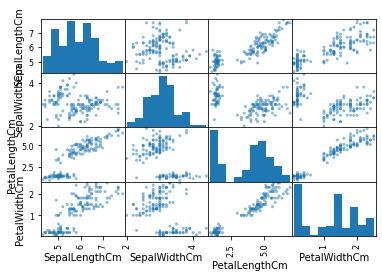

In [12]:
pd.plotting.scatter_matrix(data)

c:\users\user\ml_practice\ml_prac\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


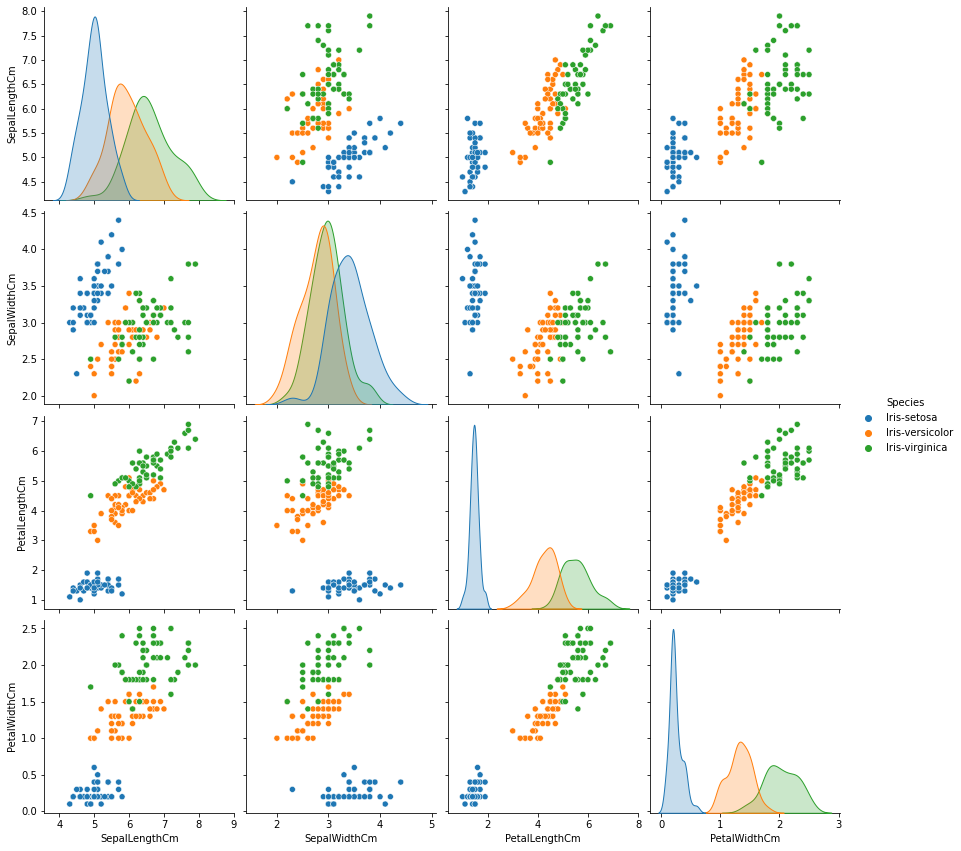

In [13]:
import seaborn as sns
sns.pairplot(data, hue='Species', size=3,)

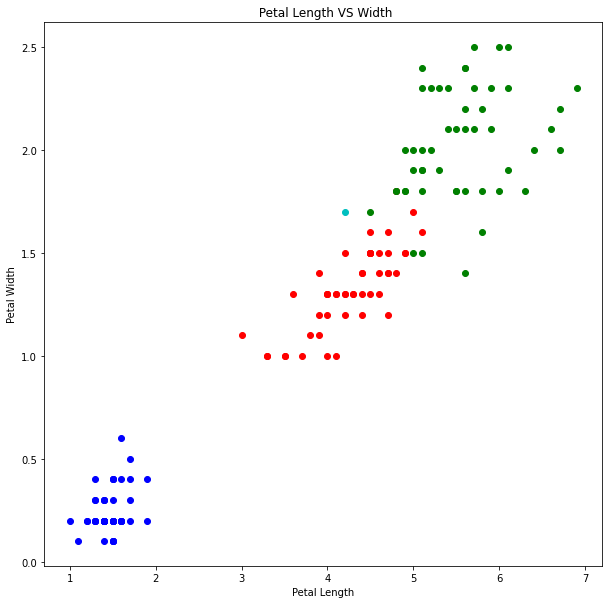

In [38]:
fig, ax = plt.subplots(figsize=(10,10))

setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

ax.scatter(x=setosa['PetalLengthCm'], y=setosa['PetalWidthCm'], c='blue')
ax.scatter(x=versicolor['PetalLengthCm'], y=versicolor['PetalWidthCm'], c='red')
ax.scatter(x=virginica['PetalLengthCm'], y=virginica['PetalWidthCm'], c='green')

x_sample = 4.2
y_sample = 1.7
plt.plot(x_sample, y_sample, 'co')

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title(" Petal Length VS Width")
plt.show()

## Алгоритмы

### Подготовка данных

In [15]:
x = data.drop('Species', axis=1)

mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
y = data['Species'].map(mapping)
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=8)

In [17]:
x_train.shape, x_test.shape

((100, 4), (50, 4))

### Алгоритмы для рассмотрения

1. Логистическая регрессия (Logistic Regression)
2. Метод ближайших соседей (KNN)
3. Решающее дерево (Decision Tree)
4. Случайный лес (Random Forest)


Загрузим готовые модели алгоритмов:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

### Логистическая регрессия

In [19]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_lr = accuracy_score(prediction,y_test)
print('The accuracy of the Logistic Regression is', accuracy_lr)

The accuracy of the Logistic Regression is 0.94


Алгоритм не имеет как таковой дополнительной настройки. Из доступного это добавление различных штрафов для признаков.

### Метод ближайших соседей (KNN)

In [40]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNeighbors Classifier is',accuracy_score(prediction,y_test))

The accuracy of the KNeighbors Classifier is 0.94


Основной параметр в алгоритме KNN число соседей. Поэкспериментируем с их числом: 

In [43]:
neighbors = list(range(1,20))
accuracy_knn = []

for i in neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    accuracy_knn.append(accuracy_score(prediction,y_test))

Число соседей с максимальной точностью ппредсказания 0.98 = [7, 8, 10]


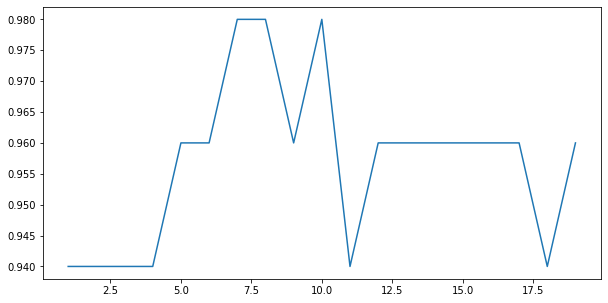

In [44]:
fig = plt.figure(figsize=(10, 5))
plt.plot(neighbors, accuracy_knn)
index_max = [num for num, i in enumerate(accuracy_knn) if i == max(accuracy_knn)]
print('Число соседей с максимальной точностью предсказания {} = {}'.format(max(accuracy_knn), [neighbors[i] for i in index_max]))

### Решающее дерево (Decision Tree)

In [23]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(x_train,y_train)
prediction=model1.predict(x_test)
print('The accuracy of the Decision Tree Classifier is',accuracy_score(prediction,y_test))

The accuracy of the Decision Tree Classifier is 0.92


Основной параметр это глубина дерева - max_depth

In [47]:
depth = list(range(2, 10))
accuracy_tree = []

for i in depth:
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    accuracy_tree.append(accuracy_score(prediction,y_test))

Глубина дерева с максимальной точностью ппредсказания 0.92 = [3, 4, 5, 6, 7, 8]


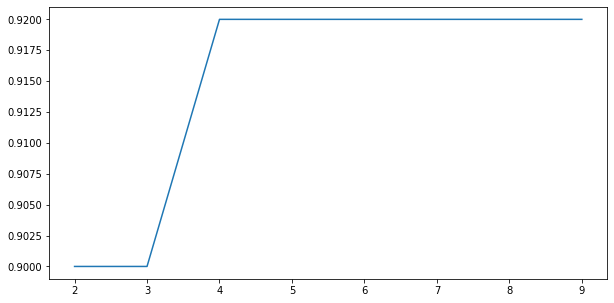

In [48]:
fig = plt.figure(figsize=(10, 5))
plt.plot(depth, accuracy_tree)
index_max = [num for num, i in enumerate(accuracy_tree) if i == max(accuracy_tree)]
print('Глубина дерева с максимальной точностью предсказания {} = {}'.format(max(accuracy_tree), [depth[i] for i in index_max]))

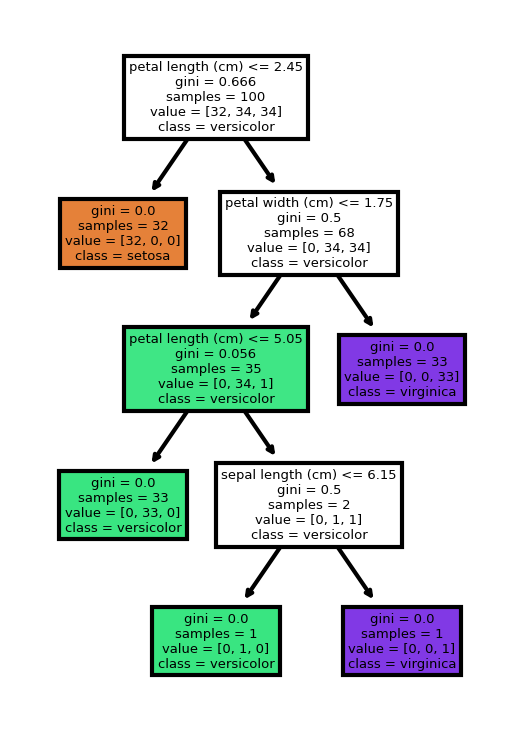

In [27]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Случайный лес (Random Forest)

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the RandomForestClassifier is',accuracy_score(prediction,y_test))

The accuracy of the RandomForestClassifier is 0.92


In [57]:
n_est = list(range(2, 100))
accuracy_rf = []

for i in n_est:
    model = RandomForestClassifier(max_depth=4, n_estimators=i, random_state=42)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    accuracy_rf.append(accuracy_score(prediction,y_test))

Глубина леса с максимальной точностью предсказания 0.94 = [5]


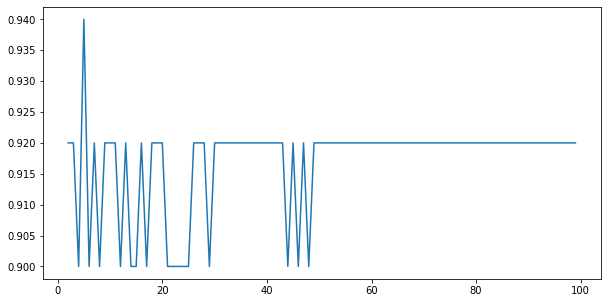

In [58]:
fig = plt.figure(figsize=(10, 5))
plt.plot(n_est, accuracy_rf)
index_max = [num for num, i in enumerate(accuracy_rf) if i == max(accuracy_rf)]
print('Глубина леса с максимальной точностью предсказания {} = {}'.format(max(accuracy_rf), [n_est[i] for i in index_max]))

Итоговая точность алгоритмов

In [59]:
acc = [accuracy_lr, max(accuracy_knn), max(accuracy_tree), max(accuracy_rf)]
print('Итоговая точность алгоритмов:\n\nЛогистическая регрессия - {}, \nБлижайших соседей - {}, \nРешающее дерево - {}, \nСлучайный лес - {}'.format(*acc))

Итоговая точность алгоритмов:

Логистическая регрессия - 0.94, 
Ближайших соседей - 0.98, 
Решающее дерево - 0.92, 
Случайный лес - 0.94
